In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Optional: To ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load the dataset

data = pd.read_csv("train.csv")

# Display the first few rows
data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Selecting relevant features
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
X = data[features]
y = data['SalePrice']

# Check for missing values
print(X.isnull().sum())
print(y.isnull().sum())



GrLivArea       0
BedroomAbvGr    0
FullBath        0
dtype: int64
0


In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the training and testing sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)



(1168, 3) (292, 3) (1168,) (292,)


In [5]:
# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Coefficients and intercept
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")


Coefficients: [   104.02630701 -26655.16535734  30014.32410896]
Intercept: 52261.74862694451


In [6]:
# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 2806426667.2478523
R^2 Score: 0.6341189942328372


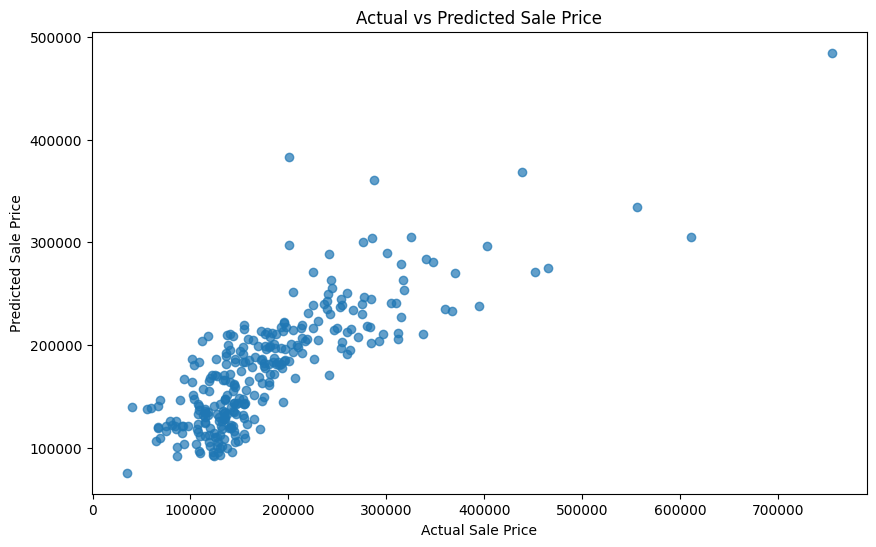

In [7]:
# Plotting the actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted Sale Price")
plt.show()


In [8]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate R² score
r2 = r2_score(y_test, y_pred)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)

# Print the evaluation metrics
print(f"R² Score: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


R² Score: 0.6341189942328372
Mean Absolute Error (MAE): 35788.061292436294
Mean Squared Error (MSE): 2806426667.2478523
Root Mean Squared Error (RMSE): 52975.717713381215


In [9]:
def predict_house_price(gr_liv_area, bedroom_abv_gr, full_bath, model):
    input_data = pd.DataFrame({
        'GrLivArea': [gr_liv_area],
        'BedroomAbvGr': [bedroom_abv_gr],
        'FullBath': [full_bath]
    })

    predicted_price = model.predict(input_data)[0]

    return predicted_price


In [10]:
# Example usage
gr_liv_area = float(input("Enter the square footage of the house (GrLivArea): "))
bedroom_abv_gr = int(input("Enter the number of bedrooms (BedroomAbvGr): "))
full_bath = int(input("Enter the number of full bathrooms (FullBath): "))

# Predict the house price
predicted_price = predict_house_price(gr_liv_area, bedroom_abv_gr, full_bath, model)

print(f"The predicted house price is: ${predicted_price:.2f}")


The predicted house price is: $290126.52


In [11]:
import pandas as pd

# Function to predict house prices for a test dataset
def predict_house_prices_for_test_file(test_file_path, model, output_file_path):
    # Load the test dataset
    test_data = pd.read_csv(test_file_path)

    # Select the relevant features
    features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
    X_test = test_data[features]

    # Predict house prices
    predicted_prices = model.predict(X_test)

    # Add the predicted prices to the test data
    test_data['PredictedPrice'] = predicted_prices

    # Save the results to a new CSV file
    test_data.to_csv(output_file_path, index=False)

    print(f"Predicted prices have been saved to {output_file_path}")


# Example usage
test_file_path = 'test.csv'  # Path to your test file
output_file_path = 'predicted_prices.csv'  # Path to save the results

# Ensure that the model has been trained before this step
predict_house_prices_for_test_file(test_file_path, model, output_file_path)


Predicted prices have been saved to predicted_prices.csv
